In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# 데이터 불러오기
data = pd.read_csv("/Users/gangjimin/PycharmProjects/AI-Overview/week3/data/car_evaluation.csv")
data['unacc'].value_counts()

unacc
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [11]:
# 결측치 확인
print("결측치 개수:")
print(data.isnull().sum())

결측치 개수:
vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64


In [12]:
# 레이블 확인
print("변환 전 unacc 분포:")
print(data['unacc'].value_counts())

변환 전 unacc 분포:
unacc
2    1209
0     384
1      69
3      65
Name: count, dtype: int64


In [3]:
# 카테고리형 데이터 인코딩
Survived_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    Survived_encoders[col] = le

# 레이블 변환 후 확인
print("변환 후 unacc 분포:")
print(data['unacc'].value_counts())

변환 후 unacc 분포:
unacc
2    1209
0     384
1      69
3      65
Name: count, dtype: int64


In [7]:
# Feature와 Target 설정
X = data.drop(columns=['unacc'])
y = data['unacc']

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화 (Logistic Regression 및 SVM에 유용)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 리스트
models = {
    "RandomForest": RandomForestClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True)
}

In [8]:
# 모델 학습
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model

RandomForest Accuracy: 0.9711
RandomForest Confusion Matrix:
[[ 75   1   1   0]
 [  2  10   0   3]
 [  1   0 236   0]
 [  2   0   0  15]]

RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        77
           1       0.91      0.67      0.77        15
           2       1.00      1.00      1.00       237
           3       0.83      0.88      0.86        17

    accuracy                           0.97       346
   macro avg       0.92      0.88      0.89       346
weighted avg       0.97      0.97      0.97       346


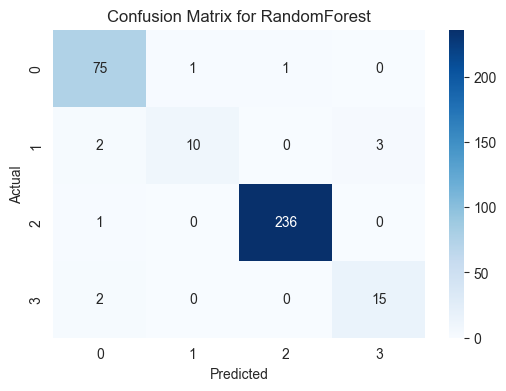

DecisionTree Accuracy: 0.9711
DecisionTree Confusion Matrix:
[[ 73   2   0   2]
 [  2  12   0   1]
 [  1   0 236   0]
 [  0   2   0  15]]

DecisionTree Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        77
           1       0.75      0.80      0.77        15
           2       1.00      1.00      1.00       237
           3       0.83      0.88      0.86        17

    accuracy                           0.97       346
   macro avg       0.89      0.91      0.90       346
weighted avg       0.97      0.97      0.97       346


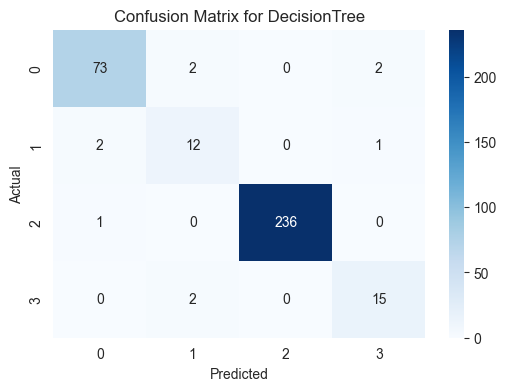

LogisticRegression Accuracy: 0.6850
LogisticRegression Confusion Matrix:
[[ 12   0  64   1]
 [  2   0  13   0]
 [ 13   0 224   0]
 [ 11   0   5   1]]

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.16      0.21        77
           1       0.00      0.00      0.00        15
           2       0.73      0.95      0.83       237
           3       0.50      0.06      0.11        17

    accuracy                           0.68       346
   macro avg       0.39      0.29      0.28       346
weighted avg       0.60      0.68      0.62       346


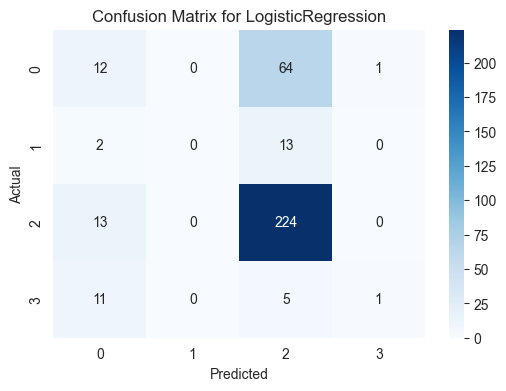

KNN Accuracy: 0.9451
KNN Confusion Matrix:
[[ 74   0   3   0]
 [  9   5   1   0]
 [  1   0 236   0]
 [  5   0   0  12]]

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        77
           1       1.00      0.33      0.50        15
           2       0.98      1.00      0.99       237
           3       1.00      0.71      0.83        17

    accuracy                           0.95       346
   macro avg       0.95      0.75      0.80       346
weighted avg       0.95      0.95      0.94       346


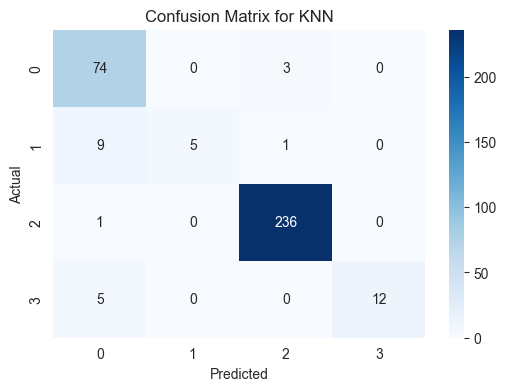

SVM Accuracy: 0.8873
SVM Confusion Matrix:
[[ 69   0   8   0]
 [ 14   0   0   1]
 [ 13   0 224   0]
 [  3   0   0  14]]

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.90      0.78        77
           1       0.00      0.00      0.00        15
           2       0.97      0.95      0.96       237
           3       0.93      0.82      0.88        17

    accuracy                           0.89       346
   macro avg       0.65      0.67      0.65       346
weighted avg       0.86      0.89      0.87       346



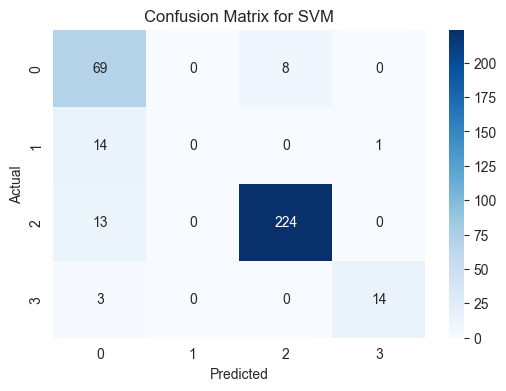

In [10]:
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)
    
    print(f"{name} Accuracy: {acc:.4f}")
    print(f"{name} Confusion Matrix:\n{cm}\n")
    print(f"{name} Classification Report:\n{report}\n")
    
    # Confusion Matrix 시각화
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()